In [1]:
using Plots;
using LaTeXStrings

In [10]:
function generate_triangular_lattice_on_a_hexagon(n::Int64,a::Float64)
    #n = number of sites on a side
    #a = lattice_constant
    #r = distance of pockets from the center
    nSites = 3*n^2 - 3*n + 1
    println("Total number of sites = ",nSites)
    coordinates_x = zeros(nSites)
    coordinates_y = zeros(nSites)

    ##generate lower part and symmetry line
    index = 0
    for jj = 1:n
        for ii = 1:(n+jj-1)
            index+=1
            coordinates_x[index] = -(jj-1)*a*(1/2) + ii*a
            coordinates_y[index] = (jj-1)*a*sqrt(3)/2
        end
    end
    ##generate upper part
    for jj = 1:(n-1)
        for ii = 1:(2n-jj-1)
            index += 1
            coordinates_x[index] = -(n-1-jj)*a*(1/2) + ii*a
            coordinates_y[index] = (jj+n-1)*a*sqrt(3)/2
        end
    end
    center_index = Int((nSites - (2*n-1))/2 + n)
    triangular_1_index = Int(center_index -r)
    triangular_2_index = Int(n + n*(n-r-1) + (n-r-2)*(n-r-1)/2)
    triangular_3_index = Int(center_index + (2*n-1) + (2*n-1)*(r-1) - r*(r-1)/2)

    array1 = [coordinates_x[triangular_1_index],coordinates_x[triangular_2_index],coordinates_x[triangular_3_index]]
    array2 = [coordinates_y[triangular_1_index],coordinates_y[triangular_2_index],coordinates_y[triangular_3_index]]

    plt1=scatter(coordinates_x,coordinates_y, markersize=6, legend=false, aspect_ratio=:equal, showaxis = false,ticks=false, color=:cyan)
    xlims!(minimum(coordinates_x), maximum(coordinates_x))
    ylims!(minimum(coordinates_y), maximum(coordinates_y))
    plt1=scatter!(array1,array2, markersize=12, color=:red)
    plt1=scatter!([coordinates_x[center_index]],[coordinates_y[center_index]], markersize=12, color=:green)
    plt1=annotate!(coordinates_x[triangular_1_index]+0.2, coordinates_y[triangular_1_index]+0.6, L"\mathbf{\mathit{k}}_1",20)
    plt1=annotate!(coordinates_x[triangular_2_index]+0.2, coordinates_y[triangular_2_index]+0.6, L"\mathbf{\mathit{k}}_3",20)
    plt1=annotate!(coordinates_x[triangular_3_index]+0.2, coordinates_y[triangular_3_index]+0.6, L"\mathbf{\mathit{k}}_2",20)
    plt1=annotate!(coordinates_x[center_index], coordinates_y[center_index]+0.6, L"\mathbf{\mathit{K}}",20)

    savefig(plt1, "triangular_lattice.pdf")
    display(plt1)
    return coordinates_x,coordinates_y;
end

generate_triangular_lattice_on_a_hexagon (generic function with 1 method)

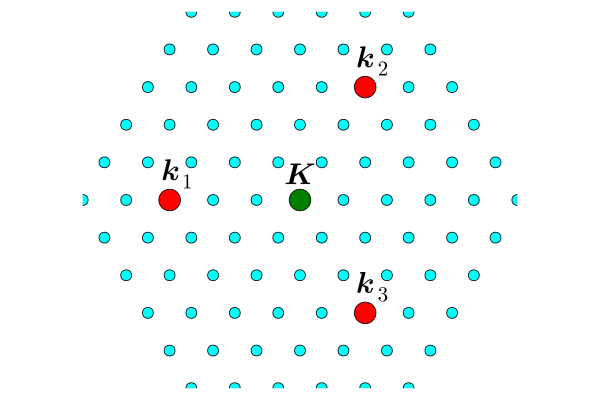

Total number of sites = 91


In [11]:
r=3;generate_triangular_lattice_on_a_hexagon(6,1.0);